## Project 01

**Type your name here**

**DSCI 35600 - Machine Learning**

## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Use `pandas` to load the contents of the tab-separated file `hw_11_data.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [3]:
df = pd.read_csv('Project01_data.txt', sep='\t')
df.head(10)

,F1,F2,F3,F4,F5,y
0,15.69,-0.771,550.880459,P,D,0
1,-16.81,1.959,588.523801,Q,C,3
2,21.09,-1.550,660.881834,P,B,2
3,15.64,-1.623,374.414543,Q,C,0
4,14.25,1.426,446.714120,Q,B,0
5,21.54,1.231,525.126448,P,D,2
6,-14.05,1.608,343.264320,P,B,3
7,-21.52,-1.858,549.753447,Q,B,1
8,12.31,-0.941,507.148376,Q,D,0
9,-24.83,-1.940,627.040100,Q,B,1


Your goal in this assignment will be to use features F1 - F6 to predict one of four possible values for y: 0, 1, 2, or 3. 

## Part B: Preparing the Data

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [15]:
X_num = df.iloc[0:,[0,1,2]].values
X_cat = df.iloc[0:,[3,4]].values.astype('str')
y = df.iloc[0:,-1].values

print(X_num.shape)
print(X_cat.shape)
print(y.shape)
print()
print(X_num[0:3,])

(467, 3)
(467, 2)
(467,)

[[ 15.69        -0.771      550.8804586 ]
 [-16.81         1.959      588.52380145]
 [ 21.09        -1.55       660.8818341 ]]


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [18]:
X_num_train, X_num_val, y_train, y_val = train_test_split(X_num, y, test_size=0.20, random_state=1)

data_scaler = StandardScaler()

X_sca_train = data_scaler.fit_transform(X_num_train)
X_sca_val = data_scaler.fit_transform(X_num_val)

print(X_sca_train.shape)
print(X_sca_val.shape)
X_sca_train[0:3,]

(373, 3)
(94, 3)


array([[-1.34790978, -0.85473365, -0.03279194],
       [-0.70984609, -0.4799912 ,  0.9331761 ],
       [-0.98459949,  1.88147176,  2.06401676]])

#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [26]:
X_cat_encoder = OneHotEncoder(sparse=False)

X_enc = X_cat_encoder.fit_transform(X_cat)

X_enc_train, X_enc_val, y_train, y_val = train_test_split(X_enc, y, test_size=0.20, random_state=1)

print(X_enc[0:2,])
print(X_enc_train.shape)
print(X_enc_val.shape)


[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]
(373, 6)
(94, 6)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [30]:
X_num_train = np.hstack([X_sca_train, X_enc_train])
X_num_val = np.hstack([X_sca_val, X_enc_val])

print(X_num_train.shape)
print(X_num_val.shape)

(373, 9)
(94, 9)


## Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -4 to 0. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

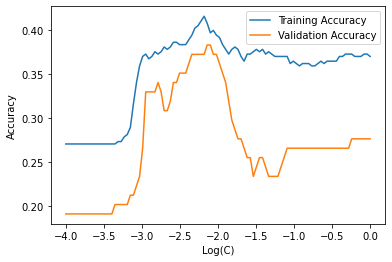

In [63]:
tr_acc = []
val_acc = []

exp_list = np.linspace(-4, 0,100)

for k in exp_list:
    LR_model_temp = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')
    LR_model_temp.fit(X_num_train, y_train)
    tr_acc.append(LR_model_temp.score(X_num_train, y_train))
    val_acc.append(LR_model_temp.score(X_num_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, val_acc, label='Validation Accuracy')
plt.xlabel('Log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [64]:
max_val_index = np.argmax(val_acc)
best_logC = exp_list[max_val_index]
print(best_logC)

-2.141414141414141


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [70]:
LR_model = LogisticRegression(solver='lbfgs', C=10**best_logC, multi_class='ovr')

LR_model.fit(X_num_train, y_train)

print('This is Logistic Regression training accuracy:', LR_model.score(X_num_train, y_train))
print('This is Logistic Regression validation accuracy:', LR_model.score(X_num_val, y_val))

This is Logistic Regression training accuracy: 0.4075067024128686
This is Logistic Regression validation accuracy: 0.3829787234042553


## Part D: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

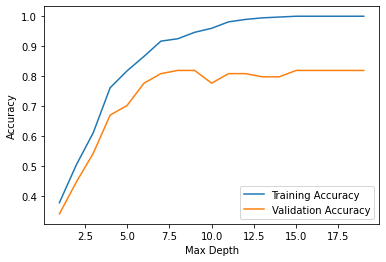

In [88]:
tr_acc = []
val_acc = []
depth_list = range(1,20)


for k in depth_list:
    np.random.seed(1)
    DT_model_temp = DecisionTreeClassifier(max_depth = k)
    DT_model_temp.fit(X_num_train, y_train)
    tr_acc.append(DT_model_temp.score(X_num_train, y_train))
    val_acc.append(DT_model_temp.score(X_num_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, val_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [92]:
max_val_index = np.argmax(val_acc)
max_depth = depth_list[max_val_index]
print(max_depth)


8


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [98]:
np.random.seed(1)
DT_model = DecisionTreeClassifier(max_depth=max_depth)

DT_model.fit(X_num_train, y_train)

print('This is Decision Tree training accuracy:', DT_model.score(X_num_train, y_train))
print('This is Decision Tree validation accuracy:', DT_model.score(X_num_val, y_val))

This is Decision Tree training accuracy: 0.9249329758713136
This is Decision Tree validation accuracy: 0.8191489361702128


## Part E: Random Forest Model

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

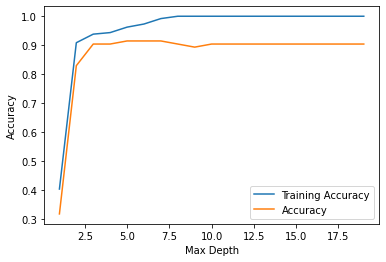

In [131]:
tr_acc = []
val_acc = []
depth_list = range(1, 20)
    
for k in depth_list:
    np.random.seed(1)
    RF_model_temp = RandomForestClassifier(n_estimators=200, max_depth=k, bootstrap=True, oob_score=True)
    RF_model_temp.fit(X_num_train, y_train)
    tr_acc.append(RF_model_temp.score(X_num_train, y_train))
    val_acc.append(RF_model_temp.score(X_num_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, val_acc, label='Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [133]:
val_max_index = np.argmax(val_acc)
max_X_zero = depth_list[val_max_index]
print(max_X_zero)

5


Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [141]:
np.random.seed(1)
RF_model = RandomForestClassifier(max_depth=max_X_zero, n_estimators = 200, bootstrap=True, oob_score=True)

RF_model.fit(X_num_train, y_train)

print('This is Random Forest Training Accuracy:', RF_model.score(X_num_train, y_train))
print('This is Random Forest Validation Accuracy:', RF_model.score(X_num_val, y_val))
print('This is Out of Bag score:', RF_model.oob_score_)

This is Random Forest Training Accuracy: 0.9624664879356568
This is Random Forest Validation Accuracy: 0.9148936170212766
This is Out of Bag score: 0.9222520107238605


In [142]:
print('This is Accuracy for the Logistic Regression Model:', LR_model.score(X_num_val, y_val)) 
print('This is Accuracy for the Decision Tree Model:', DT_model.score(X_num_val, y_val)) 
print('This is Accuracy for the Random Forest Model:', RF_model.score(X_num_val, y_val))

This is Accuracy for the Logistic Regression Model: 0.3829787234042553
This is Accuracy for the Decision Tree Model: 0.8191489361702128
This is Accuracy for the Random Forest Model: 0.9148936170212766


## Part F: Summary

Print the validation accuracies for each of the three models, clearly indicating which is which. 

print('This is Accuracy for the Logistic Regression Model:', LR_model.score(X_num_val, y_val))
print('This is Accuracy for the Decision Tree Model:', DT_model.score(X_num_val, y_val))
print('This is Accuracy for the Random Forest Model:', RF_model.score(X_num_val, y_val))